Dataset Link: https://www.kaggle.com/datasets/atharvasoundankar/global-student-migration-and-higher-education-trends

# Pre-Processing

In [44]:
import pandas as pd
import numpy as np

In [45]:
# Load Data
df = pd.read_csv('/content/global_student_migration.csv')

print('Shape Data :', df.shape)
print(df.head())

Shape Data : (5000, 20)
  student_id origin_country destination_country destination_city  \
0     S00001        Finland              Russia           Moscow   
1     S00002             UK             Germany           Aachen   
2     S00003        Ireland              Canada        Vancouver   
3     S00004            UAE                  UK       Birmingham   
4     S00005   South Africa             Germany        Stuttgart   

                     university_name              course_name  \
0  Lomonosov Moscow State University         Computer Science   
1                        RWTH Aachen        Civil Engineering   
2     University of British Columbia                      Law   
3           University of Birmingham             Data Science   
4            University of Stuttgart  Business Administration   

    field_of_study  year_of_enrollment scholarship_received  \
0      Engineering                2021                   No   
1              Law                2023            

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   student_id                 5000 non-null   object 
 1   origin_country             5000 non-null   object 
 2   destination_country        5000 non-null   object 
 3   destination_city           5000 non-null   object 
 4   university_name            5000 non-null   object 
 5   course_name                5000 non-null   object 
 6   field_of_study             5000 non-null   object 
 7   year_of_enrollment         5000 non-null   int64  
 8   scholarship_received       5000 non-null   object 
 9   enrollment_reason          5000 non-null   object 
 10  graduation_year            5000 non-null   int64  
 11  placement_status           5000 non-null   object 
 12  placement_country          2509 non-null   object 
 13  placement_company          2509 non-null   objec

In [26]:
df.describe()

,year_of_enrollment,graduation_year,starting_salary_usd,gpa_or_score,test_score
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2021.011000,2023.017800,44552.531000,3.246820,5.632200
std,1.420733,1.651432,50719.190623,0.430659,2.973838
min,2019.000000,2020.000000,0.000000,2.500000,0.000000
25%,2020.000000,2022.000000,0.000000,2.877500,5.300000
50%,2021.000000,2023.000000,30516.500000,3.240000,6.500000
75%,2022.000000,2024.000000,87838.500000,3.610000,7.800000
max,2023.000000,2026.000000,149932.000000,4.000000,9.000000


In [27]:
#Cek Missing Value
df.isnull().sum()

,0
student_id,0
origin_country,0
destination_country,0
destination_city,0
university_name,0
course_name,0
field_of_study,0
year_of_enrollment,0
scholarship_received,0
enrollment_reason,0


In [28]:
#Menangani Missing Value
df['placement_country'] = df['placement_country'].fillna("Not Placed")
df['placement_company'] = df['placement_company'].fillna("Not Placed")
df['language_proficiency_test'] = df['language_proficiency_test'].fillna("Not Required")

print("Missing After Cleaning:")
print(df.isnull().sum())

Missing After Cleaning:
student_id                   0
origin_country               0
destination_country          0
destination_city             0
university_name              0
course_name                  0
field_of_study               0
year_of_enrollment           0
scholarship_received         0
enrollment_reason            0
graduation_year              0
placement_status             0
placement_country            0
placement_company            0
starting_salary_usd          0
gpa_or_score                 0
visa_status                  0
post_graduation_visa         0
language_proficiency_test    0
test_score                   0
dtype: int64


In [46]:
#Cek Duplikasi
df.duplicated().sum()

np.int64(0)

In [30]:
#Mendeteksi Outlier
Q1 = df['starting_salary_usd'].quantile(0.25)
Q3 = df['starting_salary_usd'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

# Filter data
df = df[(df['starting_salary_usd'] >= lower_bound) &
        (df['starting_salary_usd'] <= upper_bound)]

print("Shape Setelah Remove Outlier:", df.shape)

Lower Bound: -131757.75
Upper Bound: 219596.25
Shape Setelah Remove Outlier: (5000, 20)


In [31]:
# Normalisasi
min_val = df['starting_salary_usd'].min()
max_val = df['starting_salary_usd'].max()

df['salary_minmax'] = (df['starting_salary_usd'] - min_val) / (max_val - min_val)

print(df[['starting_salary_usd', 'salary_minmax']].head())

   starting_salary_usd  salary_minmax
0                36416       0.242883
1                32956       0.219806
2                    0       0.000000
3                50892       0.339434
4                54790       0.365432


In [32]:
# Standarisasi Z-Score
mean_val = df['starting_salary_usd'].mean()
std_val = df['starting_salary_usd'].std()

df['salary_zscore'] = (df['starting_salary_usd'] - mean_val) / std_val

print(df[['starting_salary_usd', 'salary_zscore']].head())

   starting_salary_usd  salary_zscore
0                36416      -0.160423
1                32956      -0.228642
2                    0      -0.878416
3                50892       0.124992
4                54790       0.201846


In [33]:
#Discretization
df['gpa_category'] = pd.cut(
    df['gpa_or_score'],
    bins=[2.5, 3.0, 3.5, 4.0],
    labels=['Low', 'Medium', 'High']
)

print(df['gpa_category'].value_counts())

gpa_category
Medium    1717
Low       1670
High      1606
Name: count, dtype: int64


# Data Visualization

In [34]:
import matplotlib.pyplot as plt

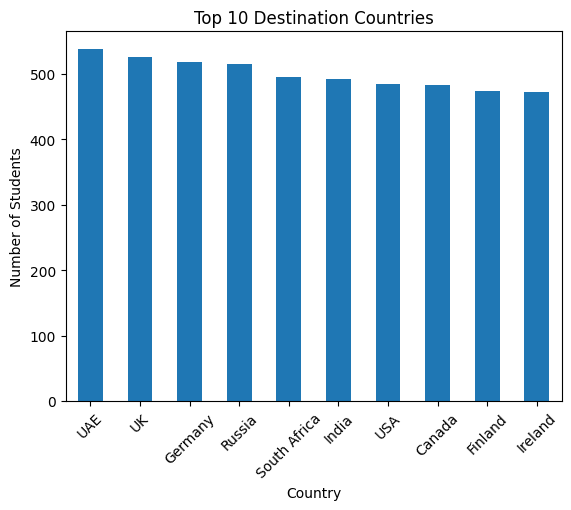

In [35]:
#Top 10 Destinasi Negara
top_dest = df['destination_country'].value_counts().head(10)

plt.figure()
top_dest.plot(kind='bar')
plt.title("Top 10 Destination Countries")
plt.xlabel("Country")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.show()

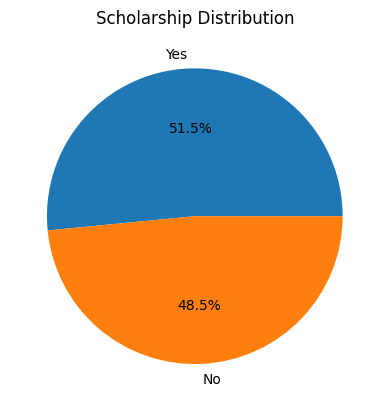

In [40]:
#Distribusi Beasiswa
scholarship_counts = df['scholarship_received'].value_counts()

plt.figure()
scholarship_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Scholarship Distribution")
plt.ylabel("")
plt.show()

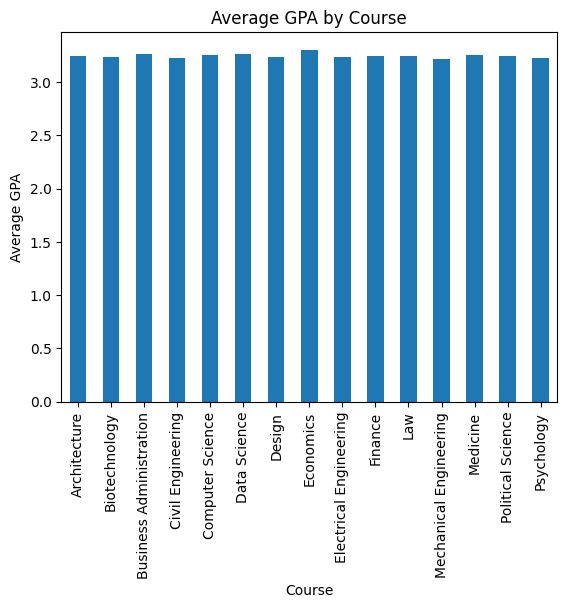

In [53]:
df_gpa = df[df['gpa_or_score'] > 0]
avg_gpa = df_gpa.groupby('course_name')['gpa_or_score'].mean()

plt.figure()
avg_gpa.plot(kind='bar')
plt.title("Average GPA by Field of Study")
plt.xlabel("Course")
plt.ylabel("Average GPA")
plt.show()

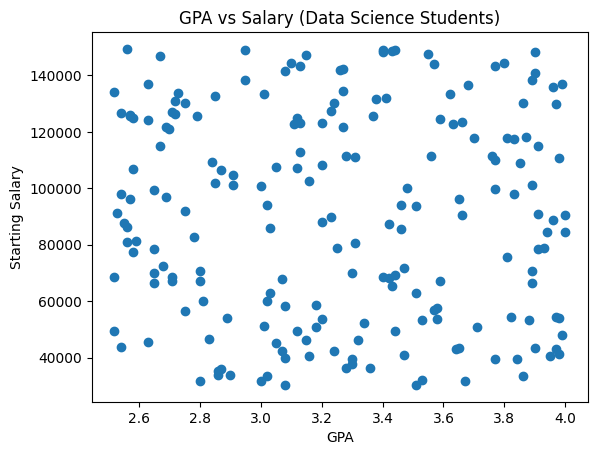

In [52]:
#Gpa vs salary data science
ds = df[df['course_name'] == 'Data Science']
ds_clean = ds[(ds['gpa_or_score'] > 0) &
              (ds['starting_salary_usd'] > 0)]

plt.figure()
plt.scatter(ds_clean['gpa_or_score'],
            ds_clean['starting_salary_usd'])
plt.xlabel("GPA")
plt.ylabel("Starting Salary")
plt.title("GPA vs Salary (Data Science Students)")
plt.show()

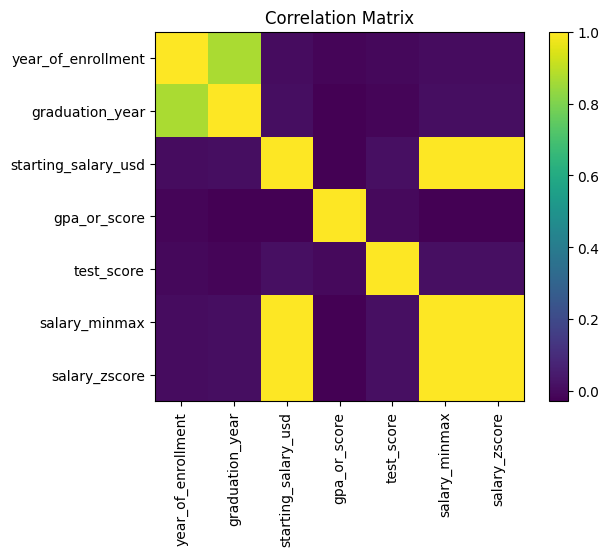

In [43]:
#Korelasi Matriks
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()

plt.figure()
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix")
plt.show()
